In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load the dataset
df = pd.read_csv('SampleSuperstore.csv')

# 3. Clean Column Names (Standardizing to lowercase/underscore)
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

# 4. Preview
print("Columns:", df.columns.tolist())
df.head()

Columns: ['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'category', 'sub_category', 'sales', 'quantity', 'discount', 'profit']


,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


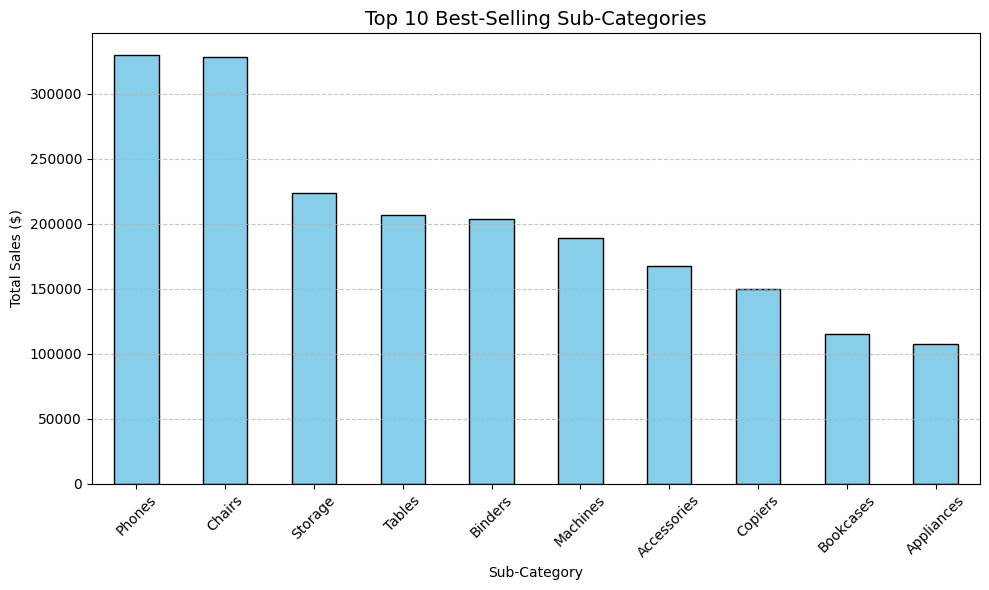

In [2]:
# Group by Sub-Category and Sum Sales
top_products = df.groupby('sub_category')['sales'].sum().sort_values(ascending=False).head(10)

# Create Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')

# Styling
plt.title('Top 10 Best-Selling Sub-Categories', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show
plt.tight_layout()
plt.show()

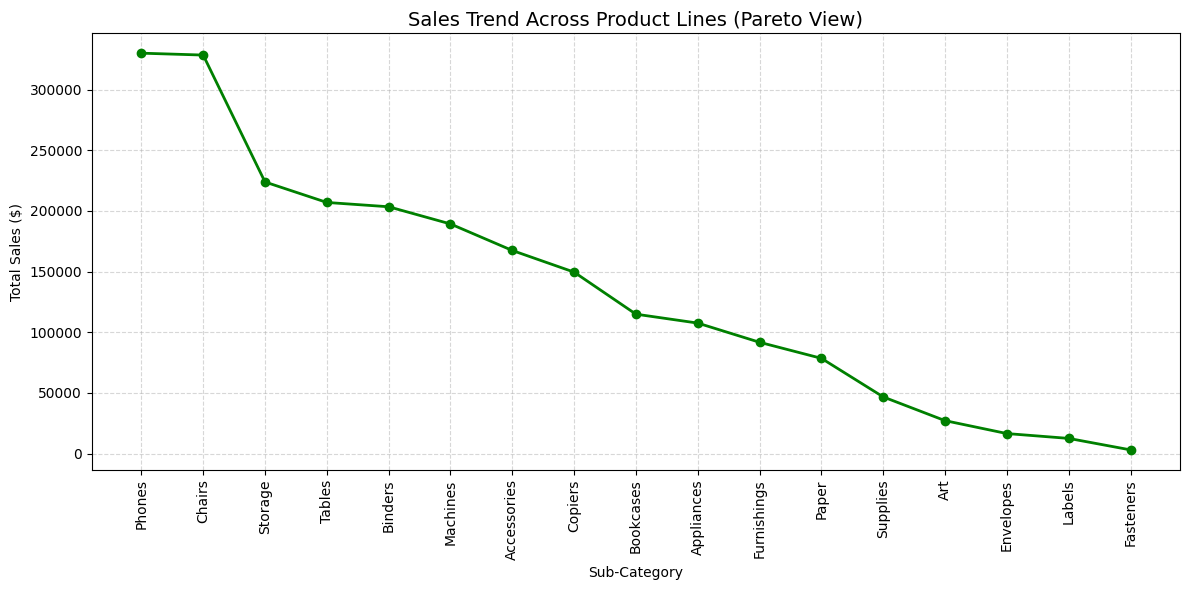

In [3]:
# We will plot Sales for ALL sub-categories to see the drop-off trend
category_trend = df.groupby('sub_category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.plot(category_trend.index, category_trend.values, marker='o', linestyle='-', color='green', linewidth=2)

# Styling
plt.title('Sales Trend Across Product Lines (Pareto View)', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

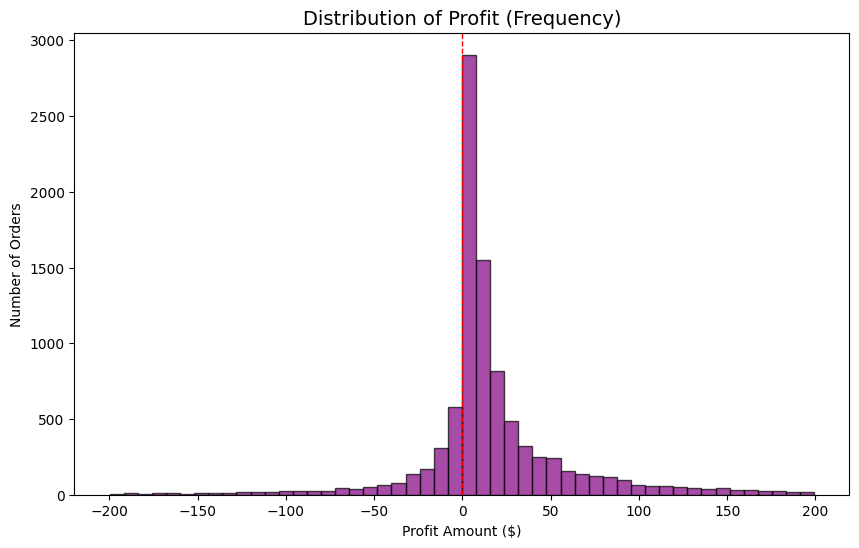

In [4]:
# Plot distribution of Profit (filtering outliers for better view)
# We focus on profits between -$200 and $200
filtered_profit = df[(df['profit'] > -200) & (df['profit'] < 200)]['profit']

plt.figure(figsize=(10, 6))
plt.hist(filtered_profit, bins=50, color='purple', alpha=0.7, edgecolor='black')

# Styling
plt.title('Distribution of Profit (Frequency)', fontsize=14)
plt.xlabel('Profit Amount ($)')
plt.ylabel('Number of Orders')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1) # Zero profit line

plt.show()

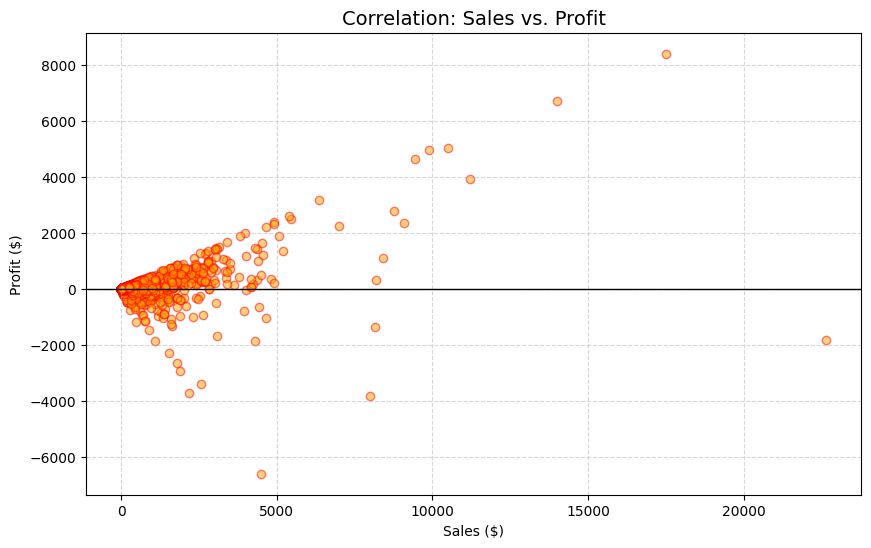

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sales'], df['profit'], alpha=0.5, color='orange', edgecolors='red')

# Styling
plt.title('Correlation: Sales vs. Profit', fontsize=14)
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True, linestyle='--', alpha=0.5)

# Highlight: Add a zero line
plt.axhline(0, color='black', linewidth=1)

plt.show()

**📊 Data Visualization Insights**

*Top Performers*: Phones and Chairs are the clear leaders in revenue,
significantly outperforming other sub-categories (Bar Chart).

*Profitability Risk:* The Scatter Plot reveals a dangerous trend where high sales do not guarantee high profit. There are several high-value transactions (Sales > $5000) that resulted in negative profit (losses), likely due to heavy discounting.

*Volume vs. Value:* The Histogram shows that the vast majority of our orders generate small profits (between $0 and $50). We rely on volume rather than high-margin individual sales.